<a href="https://colab.research.google.com/github/ymuto0302/base2_2020/blob/master/stock_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 経済データの分析：企業の株価推移の相関
最初にデータの分布を調べる。

その後，同一業種内での企業について株価推移の相関を求める。

### (準備)  Google Drive のマウント

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### (準備) Plotly Express & quandl のインストール

In [4]:
!pip install plotly_express

In [17]:
!pip install quandl

## 東証における17業種区分での企業数

In [12]:
import pandas as pd
companies = pd.read_csv("/content/drive/My Drive/BASE2/EconomicData/TSE_corp_list.csv")

# TSEコードと 17業種区分のみ取り出して，業種区分でグループ化
companies = companies[['コード', '17業種区分']]
kubun = companies.groupby('17業種区分').count()

# 可視化
import plotly_express as px
fig = px.bar(kubun) #, orientation='h') # orientation='h' は horizontal を意味する
fig.show()

## (参考) 東証における33業種区分での企業数

In [14]:
import pandas as pd
companies = pd.read_csv("/content/drive/My Drive/BASE2/EconomicData/TSE_corp_list.csv")

# TSEコードと 33業種区分のみ取り出して，業種区分でグループ化
companies = companies[['コード', '33業種区分']]
kubun = companies.groupby('33業種区分').count()

# 可視化
import plotly_express as px
fig = px.bar(kubun, orientation='h') # orientation='h' は horizontal を意味する
fig.show()

## 複数の企業株価の推移を並べてみる
以下では17業種区分にて「電機・精密」に分類されるソニーと日立製作所
および「食品」に区分される伊藤園の株価の推移を調べる。

下記のコードおよび実行結果に示すように，ソニーと日立製作所の株価の動きは類似するが，伊藤園は他の２社と異なる動きをしている。

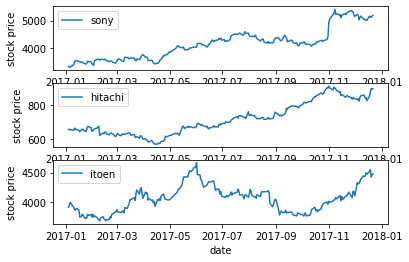

In [18]:
import quandl

quandl.ApiConfig.api_key = "swWCyaT7PznGyDJwoPys"

# 株価の取得
# ソニー(TSE/6758)，日立製作所 (TSE/6501)，伊藤園(TSE/2593)
sony = quandl.get('TSE/6758', start_date='2017-01-01', end_date='2017-12-31')
hitachi = quandl.get('TSE/6501', start_date='2017-01-01', end_date='2017-12-31')
itoen = quandl.get('TSE/2593', start_date='2017-01-01', end_date='2017-12-31')

# 可視化 (本来，Figure を使う方が望ましいが，簡易版で勘弁して！)
import matplotlib.pyplot as plt
plt.subplot(3,1,1)
plt.plot(sony['Close'], label='sony')
plt.legend()
plt.xlabel("date")
plt.ylabel("stock price")

plt.subplot(3,1,2)
plt.plot(hitachi['Close'], label='hitachi')
plt.legend()
plt.xlabel("date")
plt.ylabel("stock price")

plt.subplot(3,1,3)
plt.plot(itoen['Close'], label='itoen')
plt.legend()
plt.xlabel("date")
plt.ylabel("stock price")

plt.show()

## ２つの企業間の株価の(時系列)相関を調べる

In [19]:
# ソニーと日立製作所
corr = sony['Close'].corr(hitachi['Close'])
print("ソニーと日立製作所の相関係数: {}".format(corr))

# ソニーと伊藤園
corr = sony['Close'].corr(itoen['Close'])
print("ソニーと伊藤園の相関係数: {}".format(corr))


ソニーと日立製作所の相関係数: 0.8353219741872472
ソニーと伊藤園の相関係数: 0.43117381623009904


## 同一業種における株価推移の相関
業種を絞り，その業種に含まれる企業間の株価推移の相関を調べる。

In [21]:
# 同一業種における株価推移の相関
import pandas as pd
import sys

# 企業リストの取得
companies = pd.read_csv("/content/drive/My Drive/BASE2/EconomicData/TSE_corp_list.csv")

# 銀行のみに絞り込む
corps = companies[companies['17業種区分'] == '銀行']

In [22]:
corps

,コード,銘柄名,33業種コード,33業種区分,17業種コード,17業種区分
1346,7150,島根銀行,7050,銀行業,15,銀行
1347,7161,じもとホールディングス,7050,銀行業,15,銀行
1349,7167,めぶきフィナンシャルグループ,7050,銀行業,15,銀行
1350,7173,東京きらぼしフィナンシャルグループ,7050,銀行業,15,銀行
1351,7180,九州フィナンシャルグループ,7050,銀行業,15,銀行
...,...,...,...,...,...,...
1794,8562,福島銀行,7050,銀行業,15,銀行
1795,8563,大東銀行,7050,銀行業,15,銀行
1807,8600,トモニホールディングス,7050,銀行業,15,銀行
1825,8713,フィデアホールディングス,7050,銀行業,15,銀行


In [23]:
# (参考) 組み合わせ総数の検証
from scipy.special import comb
comb(79, 2, exact=True)

3081

In [24]:
# TSE コードの組み合わせをつくる
import itertools
corps_code_combination = itertools.combinations(corps['コード'], 2)

In [25]:
corps_code_combination

In [26]:
# (参考) 組み合わせの中身を表示
for v in corps_code_combination:
    print(v)

(7150, 7161)
(7150, 7167)
(7150, 7173)
(7150, 7180)
(7150, 7182)
(7150, 7184)
(7150, 7186)
(7150, 7189)
(7150, 8303)
(7150, 8304)
(7150, 8306)
(7150, 8308)
(7150, 8309)
(7150, 8316)
(7150, 8331)
(7150, 8334)
(7150, 8336)
(7150, 8337)
(7150, 8338)
(7150, 8341)
(7150, 8342)
(7150, 8343)
(7150, 8344)
(7150, 8345)
(7150, 8346)
(7150, 8349)
(7150, 8350)
(7150, 8354)
(7150, 8355)
(7150, 8356)
(7150, 8358)
(7150, 8359)
(7150, 8360)
(7150, 8361)
(7150, 8362)
(7150, 8363)
(7150, 8364)
(7150, 8365)
(7150, 8366)
(7150, 8367)
(7150, 8368)
(7150, 8369)
(7150, 8370)
(7150, 8377)
(7150, 8379)
(7150, 8381)
(7150, 8382)
(7150, 8383)
(7150, 8385)
(7150, 8386)
(7150, 8387)
(7150, 8388)
(7150, 8392)
(7150, 8393)
(7150, 8395)
(7150, 8397)
(7150, 8399)
(7150, 8410)
(7150, 8411)
(7150, 8416)
(7150, 8418)
(7150, 8521)
(7150, 8522)
(7150, 8524)
(7150, 8527)
(7150, 8530)
(7150, 8537)
(7150, 8541)
(7150, 8542)
(7150, 8544)
(7150, 8550)
(7150, 8551)
(7150, 8558)
(7150, 8562)
(7150, 8563)
(7150, 8600)
(7150, 8713)

(メモ) iterative object は一度，回してしまうと空っぽになるため，改めて組み合わせを作る

In [28]:
# TSE コードの組み合わせをつくる
import itertools
corps_code_combination = itertools.combinations(corps['コード'], 2)

(注意) 以下では，予めダウンロードした株価データを参照する。
ファイルの置き場所に応じてパスを設定すること！

In [30]:
# 企業の組み合わせに応じた相関を求める
corr_collection = []
for c1, c2 in corps_code_combination:
    # 株価推移データの読み込み
    d1 = data = pd.read_csv("/content/drive/My Drive/TSEdata/{}.csv".format(c1))
    d2 = data = pd.read_csv("/content/drive/My Drive/TSEdata/{}.csv".format(c2))
    
    # 相関係数
    corr = d1['Close'].corr(d2['Close'])
    print(c1, c2, corr, file=sys.stderr)
    
    # 相関係数の記録
    corr_collection.append(corr)


7150 7167 -0.24480822390456
7150 7173 -0.23863151664639895
7150 7180 0.014241712263327324
7150 7182 0.004805094821107834
7150 7184 0.4226383864994078
7150 7186 0.3166307406402202
7150 7189 0.6090847642559877
7150 8303 -0.8041193898019962
7150 8304 -0.6981006205026963
7150 8306 -0.7049610138050194
7150 8308 -0.8570305205622601
7150 8309 -0.8301112225461909
7150 8316 -0.8535792545071631
7150 8331 -0.784799058295029
7150 8334 -0.7959233725114752
7150 8336 -0.8095243435441309
7150 8337 -0.8014386117952886
7150 8338 -0.8486091815832323
7150 8341 -0.77617919361522
7150 8342 -0.7687264473408639
7150 8343 -0.8228353157184016
7150 8344 -0.7452281135596875
7150 8345 -0.7687756335002671
7150 8346 -0.7988634143266033
7150 8349 -0.8255948325807575
7150 8350 -0.8504120773174365
7150 8354 -0.7373018978145661
7150 8355 -0.7573232404627752
7150 8356 -0.8478284443024893
7150 8358 -0.585094591365674
7150 8359 -0.8211698118858771
7150 8360 -0.8095479441531246
7150 8361 -0.7856728299802873
7150 8362 -0.658

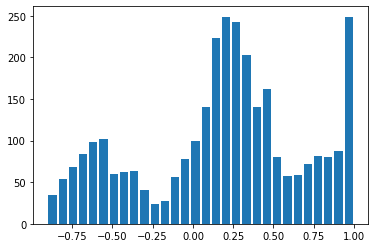

In [31]:
# 相関係数の分布の可視化
import matplotlib.pyplot as plt
plt.hist(corr_collection, bins=30, rwidth=0.8) # rwidthは棒の幅
plt.show()

### コードの全体像は以下のとおり：

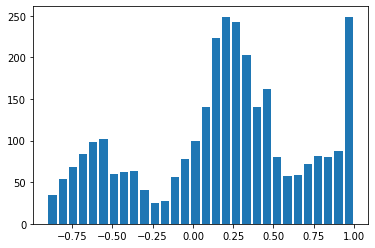

In [34]:
# 同一業種における株価推移の相関
import pandas as pd
import sys

# 企業リストの取得
companies = pd.read_csv("/content/drive/My Drive/BASE2/EconomicData/TSE_corp_list.csv")

# 銀行のみに絞り込む
corps = companies[companies['17業種区分'] == '銀行']

# TSE コードの組み合わせをつくる
import itertools
corps_code_combination = itertools.combinations(corps['コード'], 2)

# 企業の組み合わせに応じた相関を求める
corr_collection = []
for c1, c2 in corps_code_combination:
    # 株価推移データの読み込み
    d1 = data = pd.read_csv("/content/drive/My Drive/TSEdata/{}.csv".format(c1))
    d2 = data = pd.read_csv("/content/drive/My Drive/TSEdata/{}.csv".format(c2))
    
    # 相関係数
    corr = d1['Close'].corr(d2['Close'])
    # print(c1, c2, corr, file=sys.stderr)
    
    # 相関係数の記録
    corr_collection.append(corr)

# 相関係数の分布の可視化
import matplotlib.pyplot as plt
plt.hist(corr_collection, bins=30, rwidth=0.8) # rwidthは棒の幅
plt.show()
